In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pylab import mpl
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
# sns.set_style('darkgrid')
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [2]:
train_df = pd.read_csv('../data/train.csv', encoding='gbk')
test_df = pd.read_csv('../data/test.csv', encoding='gbk')
train_df.shape

(5642, 42)

# 数据分析
## 首先对数据的分布有一个大致的了解，如查看缺失值比例，数据分布等，有助于做针对性的预处理

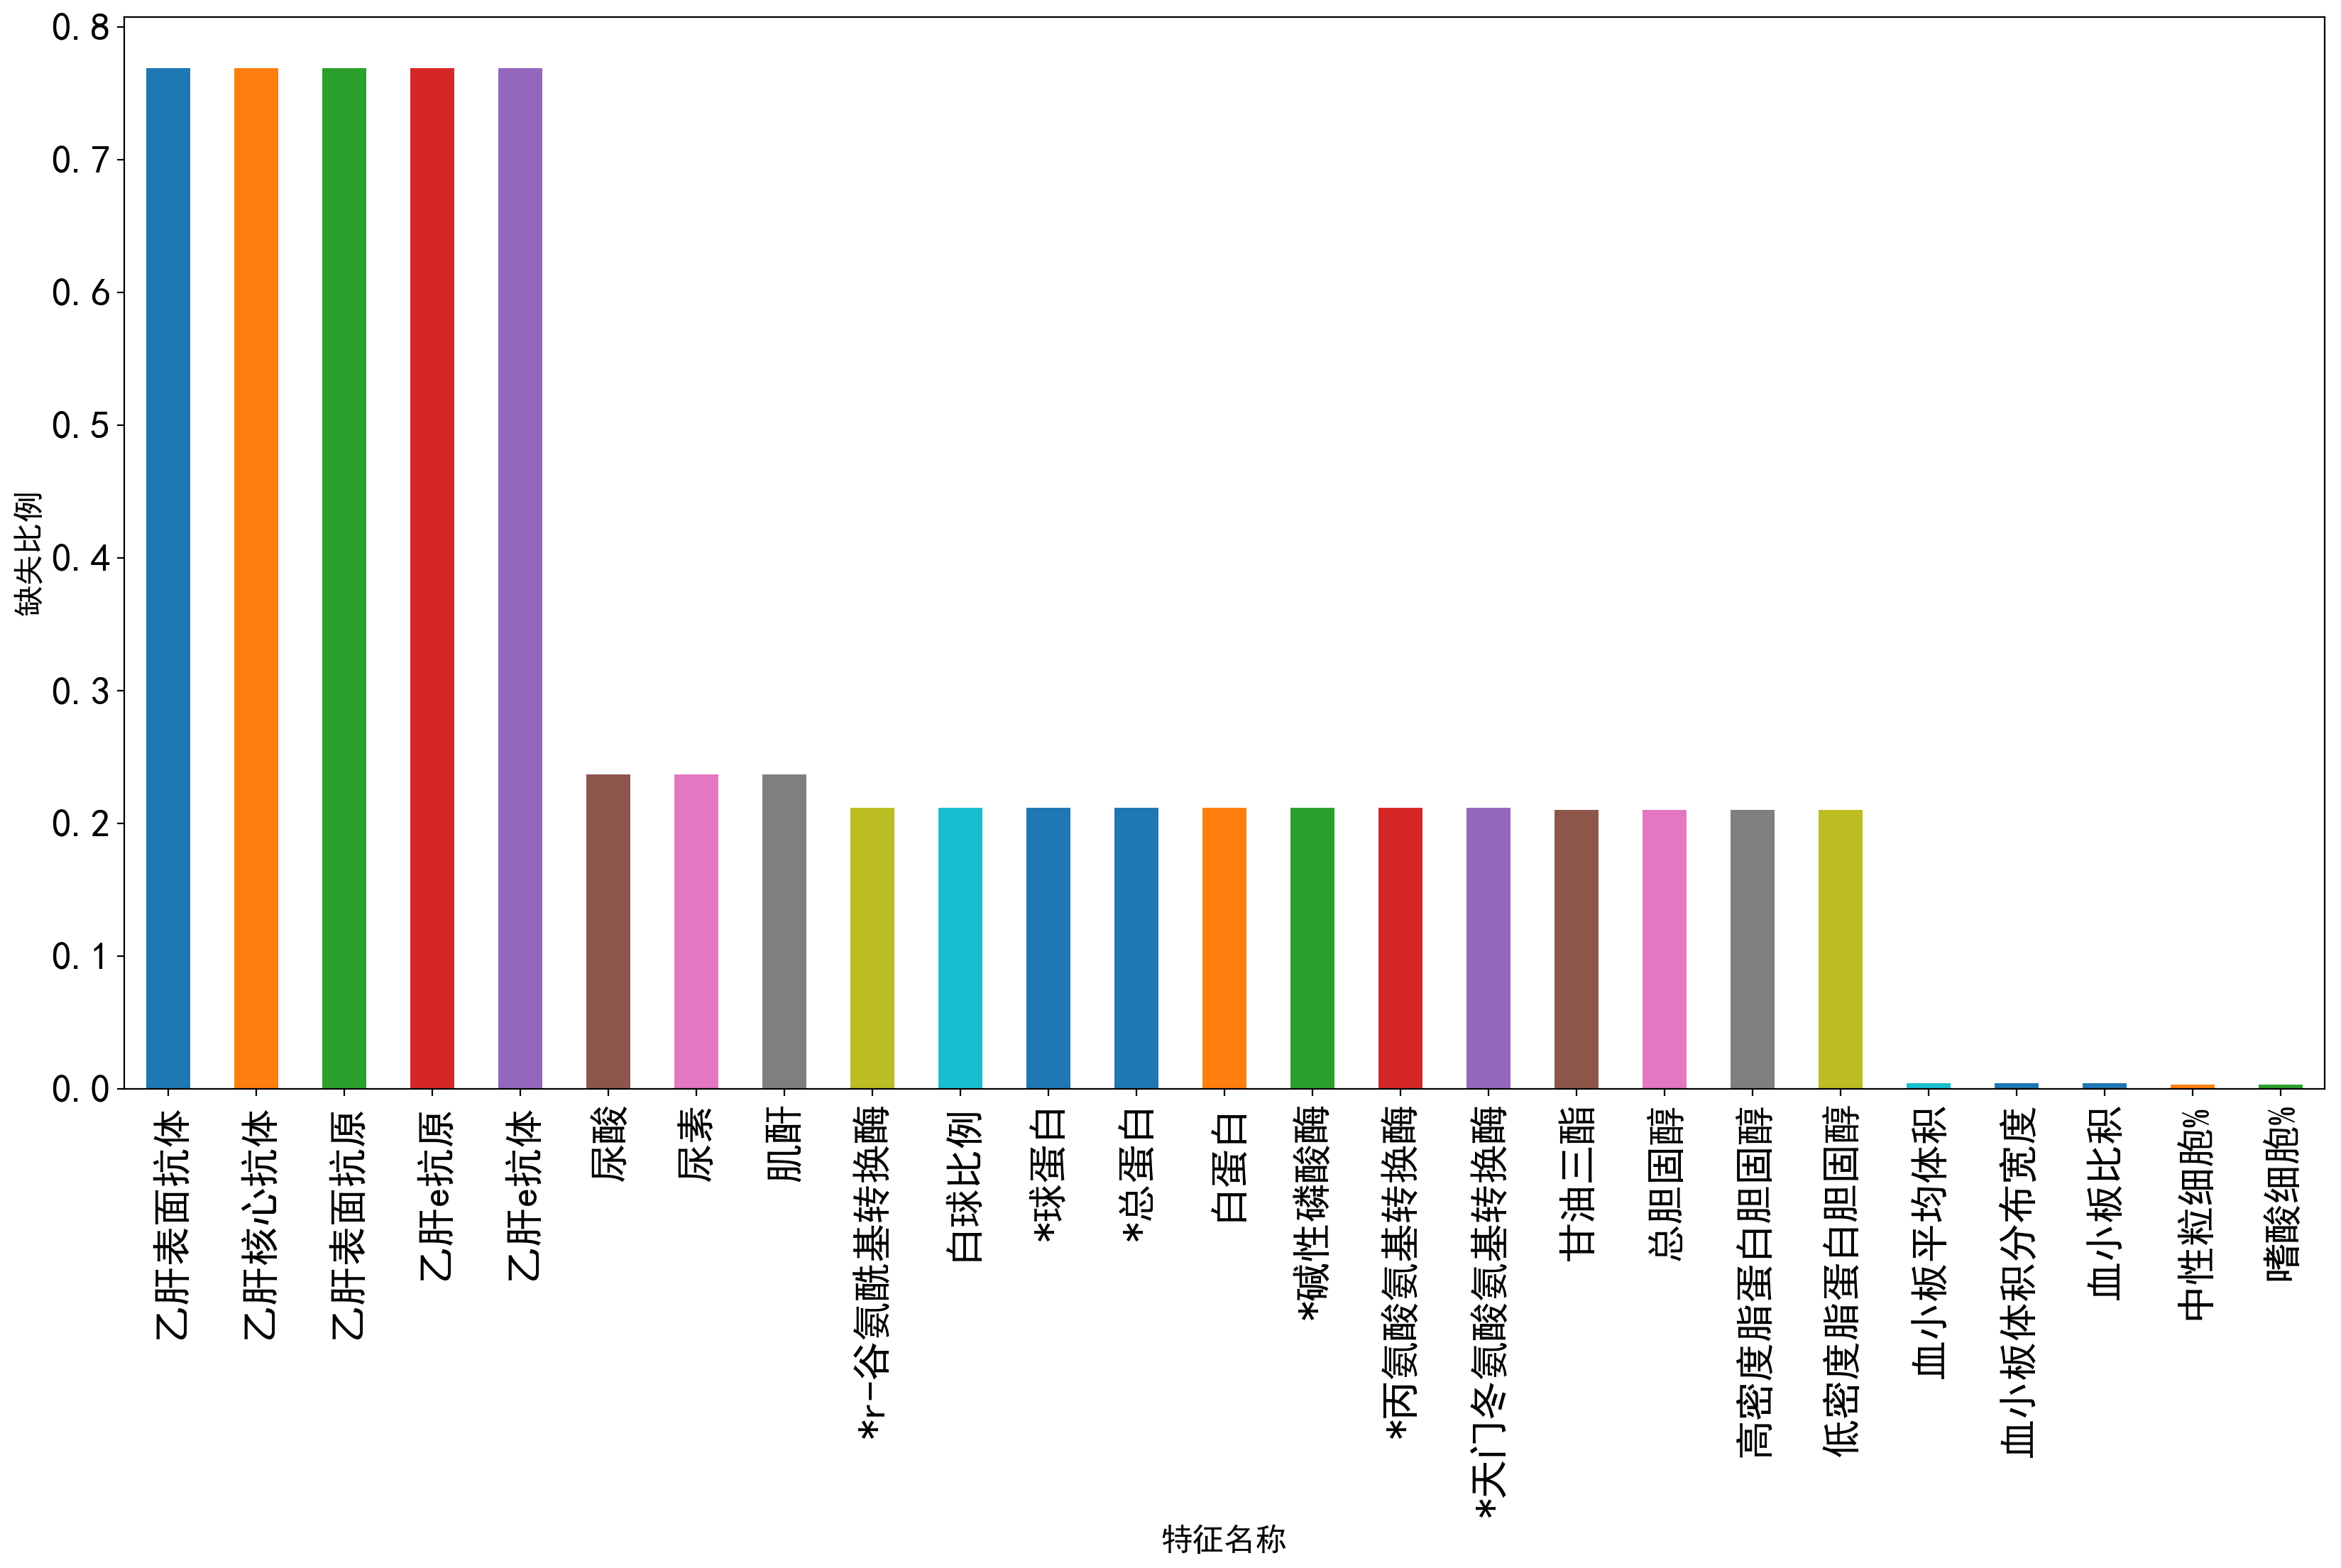

['乙肝表面抗体', '乙肝核心抗体', '乙肝表面抗原', '乙肝e抗原', '乙肝e抗体']

In [3]:
# 查看缺失数据比例
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
a =  df.isnull().sum() / len(df)
b = a.sort_values(ascending=False)[:25]
fig=plt.figure(figsize=(20, 10), dpi= 200, facecolor='w', edgecolor='k')
b.plot(kind='bar', fontsize=20)
plt.xlabel('特征名称', fontsize=16)
plt.ylabel('缺失比例', fontsize=16)
plt.show()
list(b[:5].index)

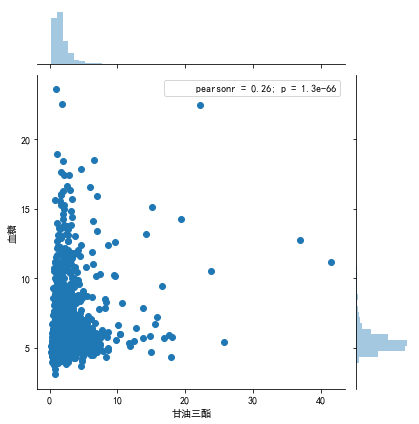

In [4]:
# 查看单个特征与血糖的相关性
fig=plt.figure(figsize=(20, 20), dpi= 200, facecolor='w', edgecolor='k')
sns.jointplot(x='甘油三酯',y='血糖',data=train_df)
plt.show()

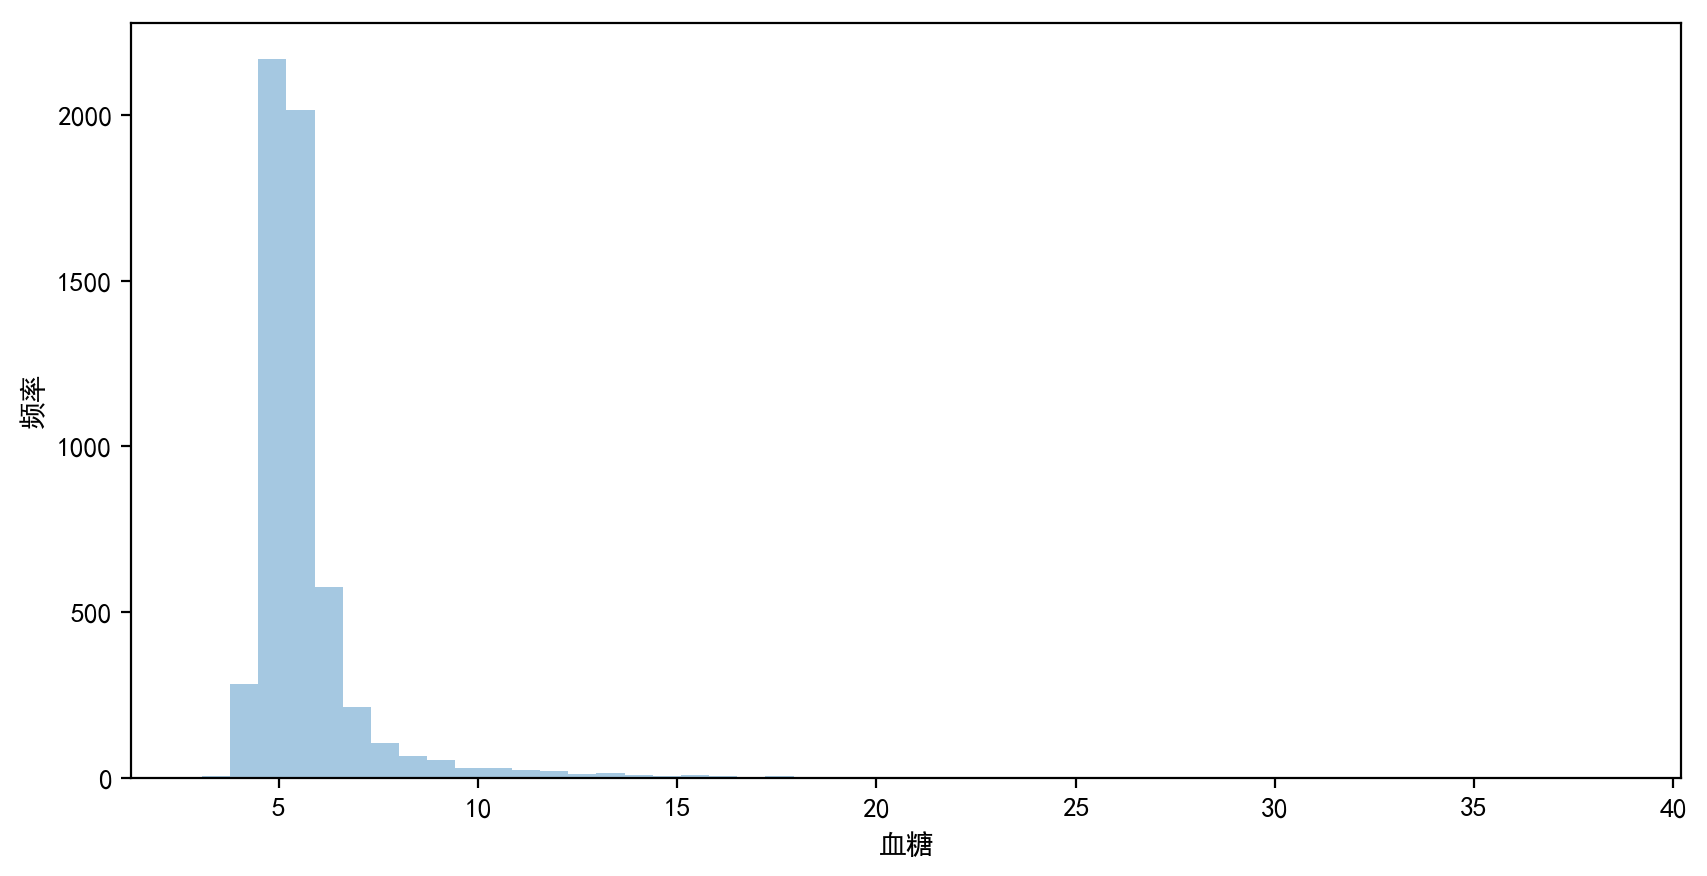

In [5]:
# 查看血糖分布
fig=plt.figure(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
sns.distplot(train_df['血糖'], kde=False)
plt.ylabel('频率')
# plt.xlim(xmax = 10)  
plt.show()

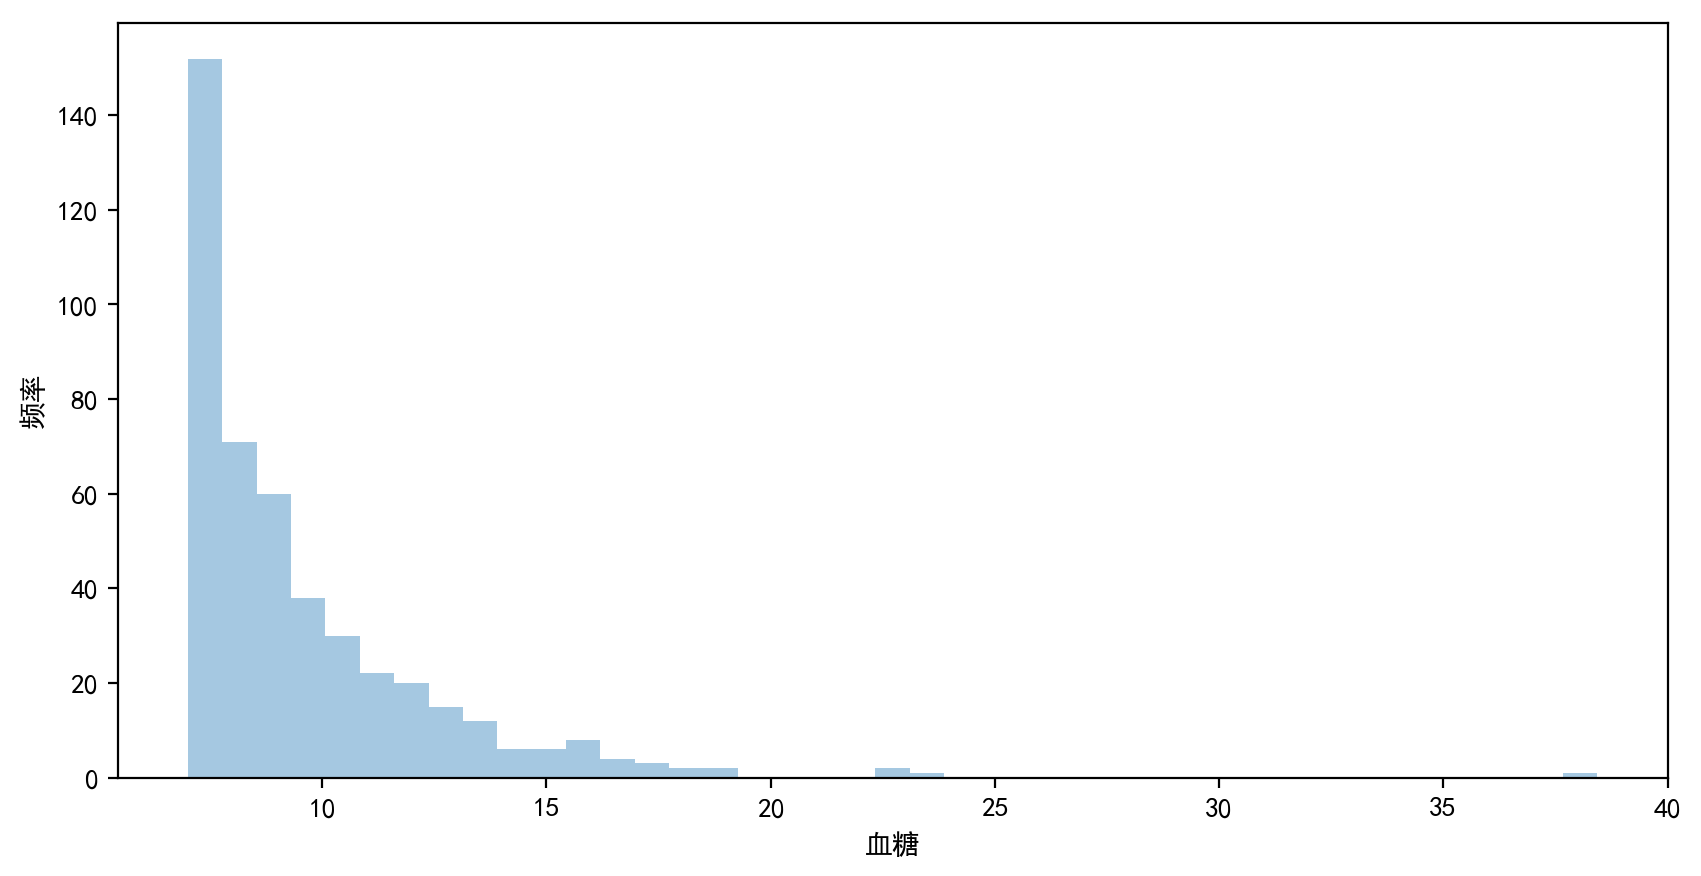

血糖高于7的患者个数： 455


In [6]:
#高血糖统计
fig=plt.figure(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
height = train_df[train_df['血糖']>7]
sns.distplot(height['血糖'],kde=False)
plt.ylabel('频率')
plt.show()
print('血糖高于7的患者个数：',len(height))

血糖高于7的患者个数： 455
共有5500名患者，只有百分之十的患者血糖值在7以上，糖尿病的诊断：按照世界统一标准，空腹血糖等于或高于7.0mmol/L。
样本分布不连续，会对模型的学习和预测造成很大影响，需要对预测出来的数据进行后处理。

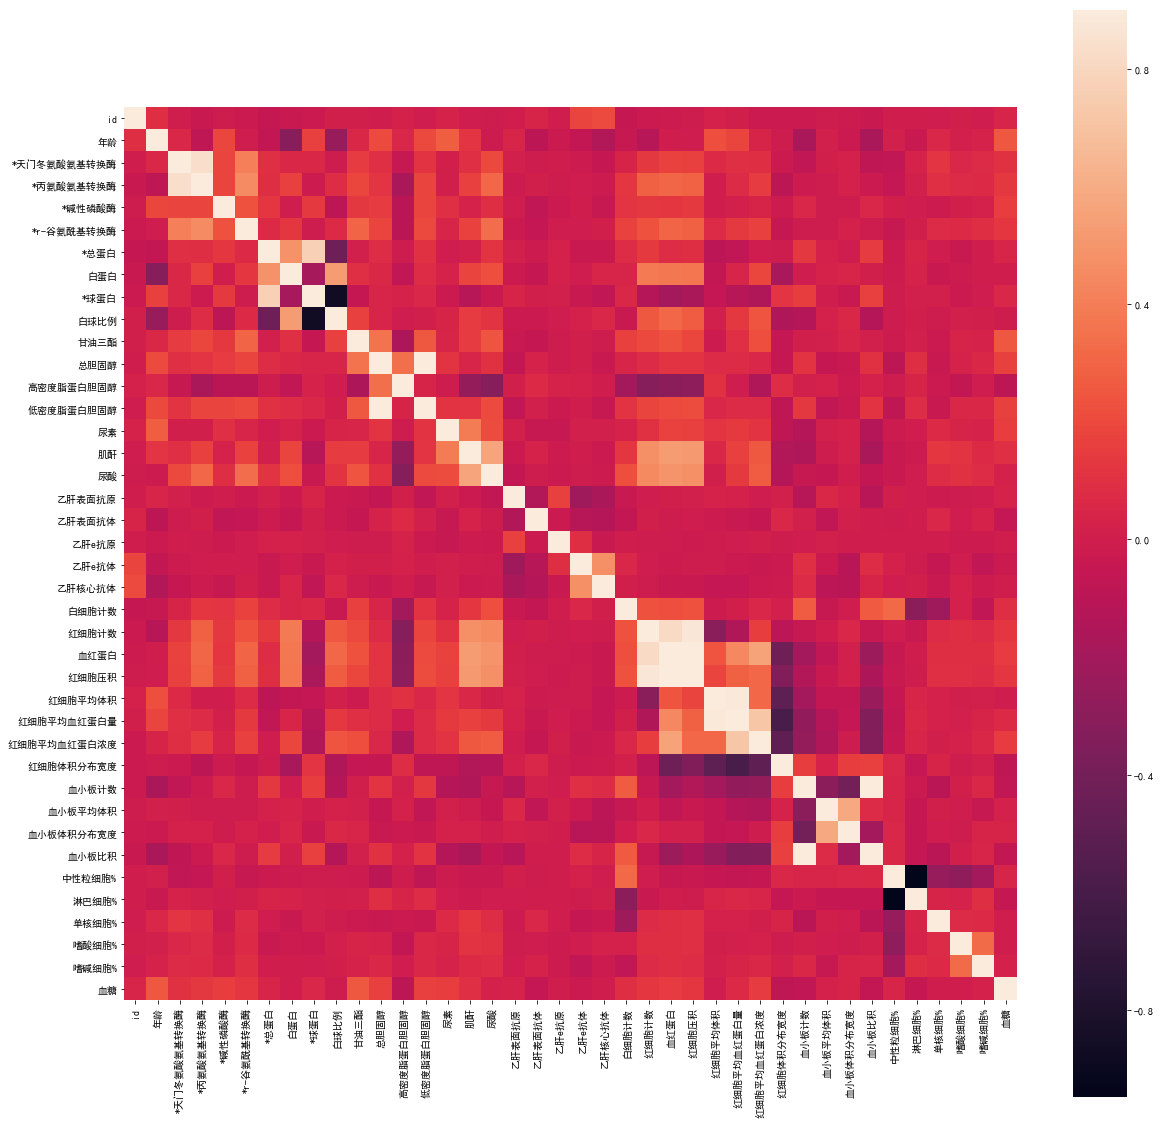

In [7]:
# 相关性矩阵
corrmat = train_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,vmax=0.9,square=True)
plt.show()

# 数据预处理
## 数据预处理包括空值填充、新建特征、对类别特征进行编码等

In [8]:
# 空值填充分两种，一种是空置太多的直接删除特征，一种是用均值或中值填充
def checknan(df):
    colnan = df.count() / df.shape[0]
    colnan = colnan[colnan < 0.5]
    return list(colnan.index)
def drop_fill(df):
    delcols = checknan(df)
    df.drop(delcols, 1, inplace=True) #删除缺失值多于一半的特征
    df.drop(['体检日期'], 1 ,inplace=True)
    df.fillna(-999, inplace=True)
    return df
def encode_cols(df):
    if isinstance(df['性别'][1],int):
        return 
    else:
        df['性别'] = df['性别'].map({'男': 0, '女': 1, '??': 3})
        return df
train_df = drop_fill(train_df)

In [9]:
encode_cols(train_df) # 类别编码

,id,性别,年龄,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
0,1,0,41,24.96,23.10,99.59,20.23,76.88,49.60,27.28,...,166.0,9.9,17.4,0.164,54.1,34.2,6.5,4.7,0.6,6.06
1,2,0,41,24.57,36.25,67.21,79.00,79.43,47.76,31.67,...,277.0,9.2,10.3,0.260,52.0,36.7,5.8,4.7,0.8,5.39
2,3,0,46,20.82,15.23,63.69,38.17,86.23,48.00,38.23,...,241.0,8.3,16.6,0.199,48.1,40.3,7.7,3.2,0.8,5.59
3,4,1,22,14.99,10.59,74.08,20.22,70.98,44.02,26.96,...,252.0,10.3,10.8,0.260,41.7,46.5,6.7,4.6,0.5,4.30
4,5,1,48,20.07,14.78,75.79,22.72,78.05,41.83,36.22,...,316.0,11.1,14.0,0.350,56.6,33.1,9.1,0.6,0.6,5.42
5,6,1,74,23.72,22.59,81.23,23.35,76.46,45.85,30.61,...,249.0,8.5,17.0,0.211,42.9,47.0,7.1,2.1,1.0,5.97
6,7,0,31,24.97,25.53,109.03,65.42,80.82,46.40,34.42,...,246.0,10.8,13.3,0.270,52.9,32.0,11.3,3.1,0.7,5.11
7,8,0,55,37.32,40.03,88.49,25.15,74.17,41.63,32.54,...,282.0,10.5,13.0,0.300,52.8,36.9,6.6,2.8,0.9,5.94
8,9,0,39,21.70,39.17,102.91,67.09,76.12,49.31,26.81,...,275.0,9.8,11.4,0.270,53.1,35.9,7.3,3.3,0.4,5.66
9,10,1,35,18.89,15.79,78.21,25.75,75.94,46.64,29.30,...,247.0,10.7,12.6,0.270,65.6,27.3,5.4,1.0,0.7,5.48


In [10]:
#新建特征
train_df['高低胆固醇比例'] = train_df['低密度脂蛋白胆固醇'] / train_df['高密度脂蛋白胆固醇']
train_df['红白细胞比例'] = train_df['白细胞计数'] / train_df['红细胞计数']
train_df.drop(['id'], 1 ,inplace=True)

In [11]:
np.count_nonzero([train_df['血糖']>6.1])

911

# 特征工程
## 通过多种方法进行特征选择

In [12]:
# 通过随机森林对特征重要性进行排序
x = np.array(train_df.drop([ '血糖'], axis=1))
y = np.array(train_df['血糖'])
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

forest = RandomForestRegressor()
forest.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
feature_importance = forest.feature_importances_  # 得到对应importance 的 array 
indices = np.argsort(feature_importance)[::-1]

In [14]:
cols = list(train_df.columns.drop('血糖'))

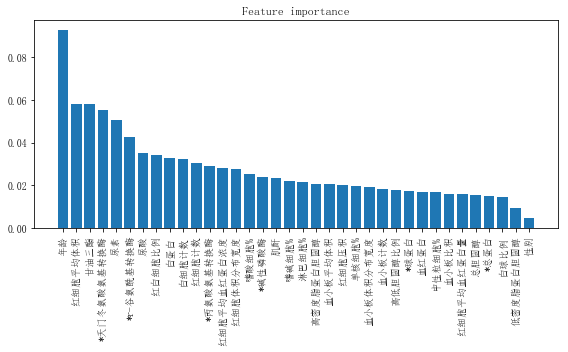

In [15]:
plt.subplots(figsize=(8,5))
plt.title('Feature importance')
plt.bar(range(x.shape[1]), feature_importance[indices])
plt.xticks(range(x.shape[1]),np.array(cols)[indices], rotation=90)
plt.tight_layout()
plt.show()

根据特征重要性排序可以看出，年龄和甘三油脂对血糖的影响比较明显，这也比较符合常理。据查，甘油三酯是由于胰岛素的敏感性不够，所以需要更多的胰岛素来维持血糖正常水平，同时这个时候甘油会结合脂肪酸变成甘油三酯。甘油三酯>2.8mmol/L的成年人差不多八成在5-8年后成为糖尿病患者或者糖尿病高危人群。这为

# 模型训练
## 切分数据集， 交叉验证 ， 选择模型 ，单个模型调参（重要参数） 

讲一下交叉验证
https://blog.csdn.net/Dream_angel_Z/article/details/47048285

In [16]:
# 单个模型参数的选择
# 调参实验 ， gridcv, cv score ， 多个评分标准
# 分别对RandomForest, XGBoost, CatBoost, CNN 进行调参

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [14]:
def show_scatter(y, y_pred, legend0, legend1, showlenth=10):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(range(showlenth),y[:showlenth], label=legend0)
    ax.scatter(range(showlenth),y_pred[:showlenth],label =legend1)
    plt.legend()
    plt.show()

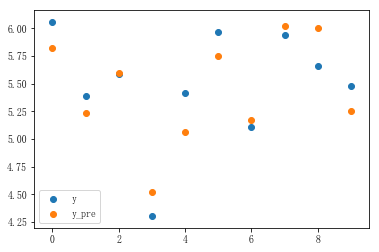

original train score: 0.476744681673


In [18]:
# Randomforest 默认参数
model_rf = RandomForestRegressor(oob_score=True, random_state= 100)
model_rf.fit(x, y)
y_pred = model_rf.predict(x)
show_scatter(y, y_pred, 'y', 'y_pre')
print('original train score:',metrics.mean_squared_error(y, y_pred))

In [19]:
# 选择不同的n_estimator
model_rf = RandomForestRegressor(oob_score=True, random_state= 100)
param_test1 = {'n_estimators':range(10,101,10)}
grid_cv = GridSearchCV(estimator=model_rf, param_grid= param_test1, scoring='neg_mean_squared_error', cv=5)
grid_cv.fit(x, y)
# print(grid_cv.cv_results_, grid_cv.best_params_, grid_cv.best_score_)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(10, 101, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [20]:
pd_grid_cv = pd.DataFrame(grid_cv.cv_results_)
pd_grid_cv

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.134221,0.003610,-2.462228,-0.406517,10,{'n_estimators': 10},10,-2.313076,-0.413618,-2.083727,...,-2.428431,-0.403402,-3.105719,-0.363363,-2.380656,-0.480993,0.021765,0.000491,0.342731,0.041751
1,2.242960,0.006224,-2.325947,-0.350322,20,{'n_estimators': 20},9,-1.869793,-0.356281,-2.135663,...,-2.224612,-0.350072,-3.090743,-0.323136,-2.309499,-0.390313,0.056224,0.000397,0.409794,0.023310
2,3.350122,0.009425,-2.291865,-0.329572,30,{'n_estimators': 30},8,-1.787103,-0.336493,-2.114605,...,-2.176602,-0.340157,-3.100122,-0.297849,-2.281496,-0.357805,0.038789,0.000507,0.436530,0.020784
3,4.502370,0.013227,-2.255379,-0.317286,40,{'n_estimators': 40},7,-1.729401,-0.330548,-2.047328,...,-2.129703,-0.315241,-3.075062,-0.289754,-2.296054,-0.337188,0.095630,0.001949,0.449265,0.016414
4,5.579052,0.015234,-2.246241,-0.311287,50,{'n_estimators': 50},6,-1.785171,-0.319908,-2.044167,...,-2.088355,-0.317155,-3.070536,-0.287636,-2.243563,-0.333043,0.113303,0.000763,0.437653,0.016125
5,6.728084,0.017847,-2.234700,-0.307622,60,{'n_estimators': 60},5,-1.756384,-0.321312,-2.035878,...,-2.081119,-0.316695,-3.065823,-0.281829,-2.234894,-0.320359,0.078075,0.000750,0.443296,0.015437
6,7.719526,0.020855,-2.228711,-0.303608,70,{'n_estimators': 70},4,-1.729107,-0.312452,-2.035590,...,-2.089411,-0.313925,-3.054962,-0.277977,-2.235100,-0.318858,0.130052,0.001150,0.444734,0.015173
7,8.879199,0.024456,-2.218651,-0.302539,80,{'n_estimators': 80},3,-1.695897,-0.314309,-2.032325,...,-2.084111,-0.313427,-3.052799,-0.274793,-2.228751,-0.313261,0.129085,0.003335,0.452085,0.015321
8,10.361444,0.027488,-2.207972,-0.298691,90,{'n_estimators': 90},2,-1.687319,-0.311630,-2.031527,...,-2.068258,-0.307495,-3.033027,-0.270053,-2.220348,-0.310380,0.157286,0.000495,0.447775,0.015650
9,11.371973,0.030868,-2.191887,-0.299812,100,{'n_estimators': 100},1,-1.648572,-0.316100,-2.029985,...,-2.044853,-0.304796,-3.032183,-0.269073,-2.204468,-0.311181,0.132249,0.000748,0.458081,0.016540


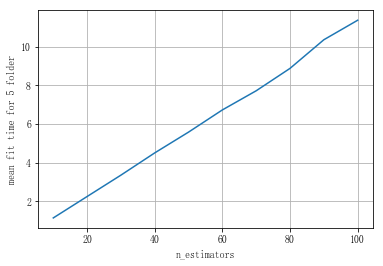

In [21]:

fit_time = pd_grid_cv['mean_fit_time']
plt.xlabel('n_estimators')
plt.ylabel('mean fit time for 5 folder')
plt.plot(range(10,101,10), fit_time)
plt.grid()

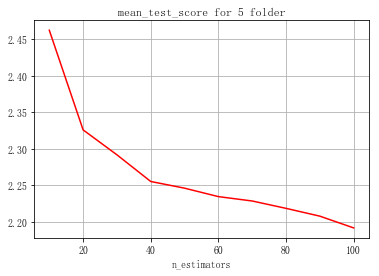

In [22]:
mean_train_score = pd_grid_cv['mean_train_score']
mean_test_score = pd_grid_cv['mean_test_score']
n_estimators = range(10,101,10)
# plt.subplot(121)
# plt.xlabel('n_estimators')
# plt.title('mean_train_score for 5 folder')
# plt.plot(n_estimators, - mean_train_score, 'b')
# plt.grid()
# plt.subplot(122)
plt.xlabel('n_estimators')
plt.title('mean_test_score for 5 folder')
plt.grid()
plt.plot(n_estimators, - mean_test_score, 'r')
plt.show()

In [23]:
model_rf_maxdepth = RandomForestRegressor(oob_score=True, random_state=100, n_estimators=100)
param_test2 = {'max_depth': [30, 50, 100, None], 'min_samples_split':[2, 10, 50]}
grid_cv_2 = GridSearchCV(estimator=model_rf_maxdepth, param_grid= param_test2, scoring='neg_mean_squared_error',cv=5, n_jobs=-1)
grid_cv_2.fit(x, y)
pd_grid_cv2 = pd.DataFrame(grid_cv_2.cv_results_)
pd_grid_cv2

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,14.469160,0.047125,-2.194425,-0.298625,30,2,"{'max_depth': 30, 'min_samples_split': 2}",12,-1.634459,-0.313354,...,-2.029276,-0.300985,-3.044611,-0.268256,-2.221376,-0.311961,0.245574,0.010067,0.466307,0.016264
1,13.170593,0.027473,-2.182996,-0.624208,30,10,"{'max_depth': 30, 'min_samples_split': 10}",8,-1.630346,-0.651758,...,-2.027258,-0.635188,-3.021804,-0.579643,-2.202960,-0.646595,0.382633,0.005586,0.459569,0.026960
2,10.677951,0.021658,-2.115394,-1.282866,30,50,"{'max_depth': 30, 'min_samples_split': 50}",4,-1.400834,-1.392352,...,-2.014006,-1.285314,-2.970803,-1.117521,-2.152307,-1.316382,0.128997,0.002583,0.501936,0.090389
3,15.732502,0.046524,-2.191887,-0.299812,50,2,"{'max_depth': 50, 'min_samples_split': 2}",9,-1.648572,-0.316100,...,-2.044853,-0.304796,-3.032183,-0.269073,-2.204468,-0.311181,0.827743,0.009630,0.458081,0.016540
4,15.040827,0.031082,-2.182877,-0.624022,50,10,"{'max_depth': 50, 'min_samples_split': 10}",5,-1.629417,-0.652283,...,-2.032652,-0.635763,-3.023262,-0.579654,-2.201267,-0.646774,0.858873,0.007818,0.460271,0.027425
5,14.292873,0.028876,-2.115373,-1.282857,50,50,"{'max_depth': 50, 'min_samples_split': 50}",1,-1.400831,-1.392332,...,-2.014000,-1.285277,-2.970713,-1.117572,-2.152273,-1.316364,0.767905,0.008106,0.501905,0.090364
6,17.588331,0.047426,-2.191887,-0.299812,100,2,"{'max_depth': 100, 'min_samples_split': 2}",9,-1.648572,-0.316100,...,-2.044853,-0.304796,-3.032183,-0.269073,-2.204468,-0.311181,0.469901,0.011443,0.458081,0.016540
7,15.461279,0.034492,-2.182877,-0.624022,100,10,"{'max_depth': 100, 'min_samples_split': 10}",5,-1.629417,-0.652283,...,-2.032652,-0.635763,-3.023262,-0.579654,-2.201267,-0.646774,0.429376,0.006233,0.460271,0.027425
8,12.287747,0.023262,-2.115373,-1.282857,100,50,"{'max_depth': 100, 'min_samples_split': 50}",1,-1.400831,-1.392332,...,-2.014000,-1.285277,-2.970713,-1.117572,-2.152273,-1.316364,0.433052,0.006834,0.501905,0.090364
9,17.591540,0.056851,-2.191887,-0.299812,None,2,"{'max_depth': None, 'min_samples_split': 2}",9,-1.648572,-0.316100,...,-2.044853,-0.304796,-3.032183,-0.269073,-2.204468,-0.311181,0.853132,0.011493,0.458081,0.016540


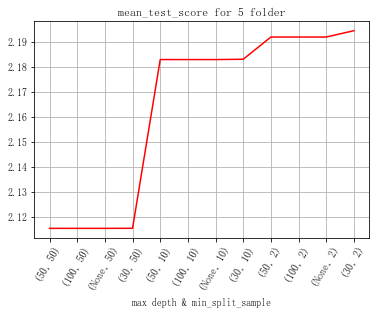

{'max_depth': 50, 'min_samples_split': 50}

In [24]:
plt.xlabel('max depth & min_split_sample')
plt.title('mean_test_score for 5 folder')
pd_grid_cv2_sorted = pd_grid_cv2.sort_values(by='rank_test_score')
length = len(pd_grid_cv2_sorted['mean_test_score'])
labels = []
# for i in range(len(pd_grid_cv2_sorted['mean_test_score'])):
#     labels.append('({},{})'.format(pd_grid_cv2_sorted['param_max_depth'][i],pd_grid_cv2_sorted['param_min_samples_split'][i]))
plt.plot(range(length), - pd_grid_cv2_sorted['mean_test_score'], 'r')
plt.xticks(range(length),zip(pd_grid_cv2_sorted['param_max_depth'],pd_grid_cv2_sorted['param_min_samples_split']), rotation=60)
# plt.xticks(range(len(labels)),labels, rotation=60)
plt.grid()
plt.show()
# pd_grid_cv2_sorted
grid_cv_2.best_params_

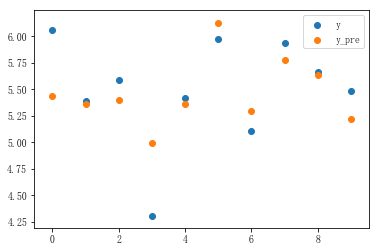

original train score: 1.29452147465


In [29]:
# 确定最终的参数
model_best_rf = RandomForestRegressor(oob_score=True, random_state=100, n_estimators=100, max_depth=50, min_samples_split=50)
model_best_rf.fit(x, y)
y_pred = model_best_rf.predict(x)
show_scatter(y, y_pred, 'y', 'y_pre')
print('original train score:',metrics.mean_squared_error(y, y_pred))

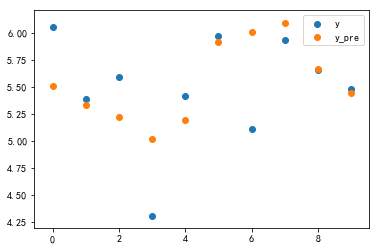

original train score: 1.3179280800684452


In [17]:
# XGBOOST 调参， 依次调整 learning_rate和 n_estimators
#                         max_depth 、min_child_weight和 gamma
#                         subsample和 colsample_bytree
#                         reg_lambda
import xgboost as xgb

# 原始参数
model_xgboost = xgb.XGBRegressor()
model_xgboost.fit(x, y)
y_pred = model_xgboost.predict(x)
show_scatter(y, y_pred, 'y', 'y_pre')
print('original train score:',metrics.mean_squared_error(y, y_pred))

In [36]:
# 首先以默认learning rate 确定n_estimator
para_gid = {'n_estimators': range(100,2001,100)}
grid_cv = GridSearchCV(estimator=model_xgboost, param_grid= para_gid, scoring='neg_mean_squared_error',cv=5)
grid_cv.fit(x, y)
cv_result = pd.DataFrame(grid_cv.cv_results_)

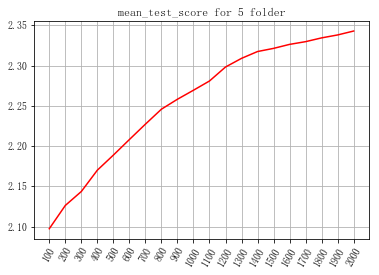

{'n_estimators': 100}

In [37]:

plt.title('mean_test_score for 5 folder')
# pd_grid_cv2_sorted = pd_grid_cv2.sort_values(by='rank_test_score')
length = len(cv_result['mean_test_score'])
plt.plot(range(length), - cv_result['mean_test_score'], 'r')
plt.xticks(range(length),cv_result['param_n_estimators'], rotation=60)
plt.grid()
plt.show()
grid_cv.best_params_

In [63]:
# 不同的max_depth , min_child_weight 下的结果
para_gid = {'max_depth': [3, 5, 7,9], 'min_child_weight': [1, 3, 5,]}
grid_cv = GridSearchCV(estimator=model_xgboost, param_grid= para_gid, scoring='neg_mean_squared_error',cv=5)
grid_cv.fit(x, y)
cv_result = pd.DataFrame(grid_cv.cv_results_)

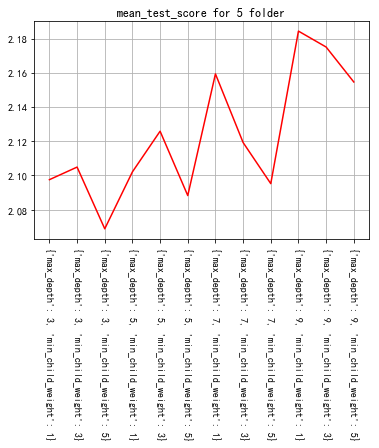

In [64]:
plt.title('mean_test_score for 5 folder')
# pd_grid_cv2_sorted = pd_grid_cv2.sort_values(by='rank_test_score')
length = len(cv_result['mean_test_score'])
plt.plot(range(length), - cv_result['mean_test_score'], 'r')
plt.xticks(range(length),cv_result['params'], rotation=-90)
plt.grid()
plt.show()

In [66]:
# 分成三列来画
df_plot = pd.DataFrame()
for weight in [1,3,5]:
    df1 = cv_result[cv_result['param_min_child_weight']==weight]
    df1.index = df1.param_max_depth
    df1 = -df1['mean_test_score']
    df_plot['min_child_weight=' + str(weight)] = df1
df_plot

,min_child_weight=1,min_child_weight=3,min_child_weight=5
param_max_depth,,,
3,2.097492,2.104843,2.068777
5,2.102060,2.125812,2.088199
7,2.159313,2.119202,2.095172
9,2.184317,2.175022,2.154594


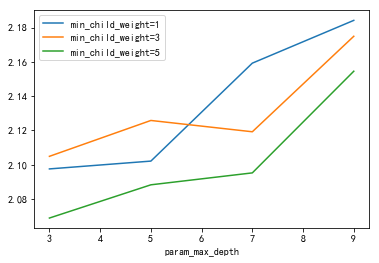

In [67]:
df_plot.plot()
plt.show()

XGBoost分类器由许多 CART构成， max_depth 、min_child_weight和 gamma是控制 CART生成的重要超参数。 
max_depth控制 CART最大深度，min_child_weight控制 CART分裂时叶节点最小权重， gamma为允许分裂的增益最小值。
增大 min_child_weight和 gamma会使模型更加保守；
增大 max_depth 会提高 模型复杂度，这意味着更容易过拟合。 
为了避免过拟合，提高模型泛化能力，本次实验中通过网格搜索的方法，找到max_depth 、min_child_weight和 gamma的最优 值 3，5，0
貌似gamma值没有影响

In [65]:
result_table = cv_result[['param_max_depth','param_min_child_weight','mean_fit_time','mean_test_score','rank_test_score']]
result_table['mean_test_score'] = -result_table['mean_test_score']
result_table.columns = ['max_path', 'min_child_weight', 'mean_fit_time', 'mean_test_score', 'rank']
result_table

,max_path,min_child_weight,mean_fit_time,mean_test_score,rank
0,3,1,0.725983,2.097492,4
1,3,3,0.737715,2.104843,6
2,3,5,0.731019,2.068777,1
3,5,1,1.233180,2.102060,5
4,5,3,1.236555,2.125812,8
5,5,5,1.208359,2.088199,2
6,7,1,1.816141,2.159313,10
7,7,3,1.784069,2.119202,7
8,7,5,1.766928,2.095172,3
9,9,1,2.484663,2.184317,12


In [42]:
# 不同的max_depth , min_child_weight 下的结果
para_gid = {'gamma': [0,0.1,0.2,0.3,0.4,0.5]}
model_xgboost = xgb.XGBRegressor(n_estimators=100, max_depth=3, min_child_weight=7)
grid_cv = GridSearchCV(estimator=model_xgboost, param_grid= para_gid, scoring='neg_mean_squared_error',cv=5)
grid_cv.fit(x, y)
cv_result = pd.DataFrame(grid_cv.cv_results_)

cv_result

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.731416,0.000801,-2.06262,-1.283155,0,{'gamma': 0},1,-1.335221,-1.4013,-2.008637,...,-1.954954,-1.294996,-2.890503,-1.19002,-2.124478,-1.243263,0.010713,0.001602,0.496562,0.069818
1,0.724505,0.000000,-2.06262,-1.283155,0.1,{'gamma': 0.1},1,-1.335221,-1.4013,-2.008637,...,-1.954954,-1.294996,-2.890503,-1.19002,-2.124478,-1.243263,0.012921,0.000000,0.496562,0.069818
2,0.748752,0.002245,-2.06262,-1.283155,0.2,{'gamma': 0.2},1,-1.335221,-1.4013,-2.008637,...,-1.954954,-1.294996,-2.890503,-1.19002,-2.124478,-1.243263,0.018080,0.001437,0.496562,0.069818
3,0.716017,0.004005,-2.06262,-1.283155,0.3,{'gamma': 0.3},1,-1.335221,-1.4013,-2.008637,...,-1.954954,-1.294996,-2.890503,-1.19002,-2.124478,-1.243263,0.007713,0.004905,0.496562,0.069818
4,0.715596,0.001998,-2.06262,-1.283155,0.4,{'gamma': 0.4},1,-1.335221,-1.4013,-2.008637,...,-1.954954,-1.294996,-2.890503,-1.19002,-2.124478,-1.243263,0.004060,0.003997,0.496562,0.069818
5,0.715531,0.004001,-2.06262,-1.283155,0.5,{'gamma': 0.5},1,-1.335221,-1.4013,-2.008637,...,-1.954954,-1.294996,-2.890503,-1.19002,-2.124478,-1.243263,0.010509,0.004900,0.496562,0.069818


subsample和 colsample_bytree
XGBoost允许对数据集利用行抽样和列以避免过拟合降低运算量。subsample是对数据集进行抽样的比例，是对数据集进行抽样的比例， colsample_bytree是对特征进行列抽样的 比例。为了提高 分类器的 训练效果 同时降低运算量，实验中通过 网格搜索 的方法选 取 subsample和 colsample_bytree的最优值 0.9和 0.8

In [75]:
subsample_list = np.array(range(5,10,1)) / 10
para_gid = {'subsample': subsample_list, 'colsample_bytree' : subsample_list}
model_xgboost = xgb.XGBRegressor(n_estimators=100, max_depth=3, min_child_weight=5)
grid_cv = GridSearchCV(estimator=model_xgboost, param_grid= para_gid, scoring='neg_mean_squared_error',cv=5)
grid_cv.fit(x, y)
cv_result = pd.DataFrame(grid_cv.cv_results_)
cv_result.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_colsample_bytree,param_subsample,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.411729,0.002001,-2.058667,-1.366388,0.5,0.5,"{'colsample_bytree': 0.5, 'subsample': 0.5}",16,-1.417224,-1.472570,...,-1.980253,-1.363330,-2.839243,-1.302827,-2.097625,-1.356264,0.012032,0.001674,0.455681,0.057085
1,0.412077,0.003998,-2.066444,-1.334273,0.5,0.6,"{'colsample_bytree': 0.5, 'subsample': 0.6}",20,-1.427969,-1.432186,...,-1.991212,-1.351214,-2.824860,-1.257533,-2.075167,-1.309971,0.005092,0.004896,0.445283,0.057523
2,0.416860,0.000000,-2.037910,-1.325760,0.5,0.7,"{'colsample_bytree': 0.5, 'subsample': 0.7}",8,-1.360841,-1.451945,...,-1.919428,-1.325176,-2.864462,-1.224311,-2.071027,-1.306015,0.005336,0.000000,0.481824,0.072972
3,0.414923,0.004603,-2.023092,-1.316904,0.5,0.8,"{'colsample_bytree': 0.5, 'subsample': 0.8}",1,-1.330722,-1.417214,...,-1.948305,-1.312604,-2.826619,-1.233690,-2.024629,-1.272546,0.005142,0.004542,0.475824,0.063196
4,0.416302,0.002000,-2.024006,-1.311113,0.5,0.9,"{'colsample_bytree': 0.5, 'subsample': 0.9}",2,-1.371809,-1.423947,...,-1.934822,-1.321407,-2.843689,-1.222624,-2.003488,-1.277844,0.003023,0.004001,0.470929,0.065995


In [79]:
result_table = cv_result[['param_colsample_bytree','param_subsample','mean_fit_time','mean_test_score','rank_test_score']]
result_table['mean_test_score'] = -result_table['mean_test_score']
result_table.columns = ['subsample', 'colsample_bytree', 'mean_fit_time', 'mean_test_score', 'rank']
result_table.head()

,subsample,colsample_bytree,mean_fit_time,mean_test_score,rank
0,0.5,0.5,0.411729,2.058667,16
1,0.5,0.6,0.412077,2.066444,20
2,0.5,0.7,0.416860,2.037910,8
3,0.5,0.8,0.414923,2.023092,1
4,0.5,0.9,0.416302,2.024006,2


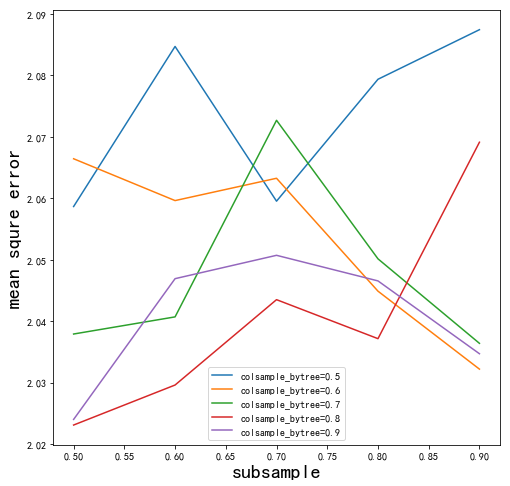

In [94]:
# 分成多列来画， 可见最好的参数为subsample =0.5, colsampleby tree = 0.8
df_plot = pd.DataFrame()
for weight in np.array(range(5,10,1)) / 10:
    df1 = result_table[result_table['colsample_bytree']==weight]
    df1.index = df1.subsample
    df1 = df1['mean_test_score']
    df_plot['colsample_bytree=' + str(weight)] = df1
df_plot.plot(figsize=[8,8])
plt.ylabel('mean squre error', fontsize=20)
plt.xlabel('subsample', fontsize=20)
# plt.title('model MSE graph for different subsample and colsample_bytree', fontsize=20)
plt.show()

reg_lambda 是XGBoost的L2正则项系数。 
XGBoost引入正则项降低模型复杂度，避免过拟合，提高 reg_lambda的值使模型更保守。

In [95]:
reg_lambda_list = np.logspace(-7,2,10)
para_gid = {'reg_lambda': reg_lambda_list}
model_xgboost = xgb.XGBRegressor(n_estimators=100, max_depth=3, min_child_weight=5, subsample=0.5, colsample_bytree=0.8)
grid_cv = GridSearchCV(estimator=model_xgboost, param_grid= para_gid, scoring='neg_mean_squared_error',cv=5)
grid_cv.fit(x, y)
cv_result = pd.DataFrame(grid_cv.cv_results_)
cv_result.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_reg_lambda,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.568930,0.002001,-2.098505,-1.328596,1e-07,{'reg_lambda': 1e-07},8,-1.381736,-1.416047,-2.024649,...,-1.985702,-1.315454,-2.906270,-1.261639,-2.194868,-1.305156,0.014728,0.001675,0.488619,0.051209
1,0.562386,0.005201,-2.098505,-1.328596,1e-06,{'reg_lambda': 1e-06},7,-1.381736,-1.416047,-2.024648,...,-1.985702,-1.315455,-2.906270,-1.261640,-2.194868,-1.305156,0.018584,0.004069,0.488619,0.051209
2,0.568185,0.001401,-2.098504,-1.328597,1e-05,{'reg_lambda': 1e-05},6,-1.381736,-1.416047,-2.024648,...,-1.985701,-1.315455,-2.906270,-1.261640,-2.194868,-1.305157,0.008251,0.001745,0.488619,0.051209
3,0.564520,0.003201,-2.098502,-1.328600,0.0001,{'reg_lambda': 0.0001},5,-1.381733,-1.416051,-2.024647,...,-1.985699,-1.315458,-2.906268,-1.261643,-2.194863,-1.305161,0.016620,0.003656,0.488620,0.051209
4,0.566020,0.002600,-2.098474,-1.328637,0.001,{'reg_lambda': 0.001},4,-1.381706,-1.416090,-2.024631,...,-1.985671,-1.315495,-2.906251,-1.261670,-2.194813,-1.305200,0.014926,0.003878,0.488622,0.051212


In [98]:
cv_result.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_reg_lambda,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.568930,0.002001,-2.098505,-1.328596,1e-07,{'reg_lambda': 1e-07},8,-1.381736,-1.416047,-2.024649,...,-1.985702,-1.315454,-2.906270,-1.261639,-2.194868,-1.305156,0.014728,0.001675,0.488619,0.051209
1,0.562386,0.005201,-2.098505,-1.328596,1e-06,{'reg_lambda': 1e-06},7,-1.381736,-1.416047,-2.024648,...,-1.985702,-1.315455,-2.906270,-1.261640,-2.194868,-1.305156,0.018584,0.004069,0.488619,0.051209
2,0.568185,0.001401,-2.098504,-1.328597,1e-05,{'reg_lambda': 1e-05},6,-1.381736,-1.416047,-2.024648,...,-1.985701,-1.315455,-2.906270,-1.261640,-2.194868,-1.305157,0.008251,0.001745,0.488619,0.051209
3,0.564520,0.003201,-2.098502,-1.328600,0.0001,{'reg_lambda': 0.0001},5,-1.381733,-1.416051,-2.024647,...,-1.985699,-1.315458,-2.906268,-1.261643,-2.194863,-1.305161,0.016620,0.003656,0.488620,0.051209
4,0.566020,0.002600,-2.098474,-1.328637,0.001,{'reg_lambda': 0.001},4,-1.381706,-1.416090,-2.024631,...,-1.985671,-1.315495,-2.906251,-1.261670,-2.194813,-1.305200,0.014926,0.003878,0.488622,0.051212


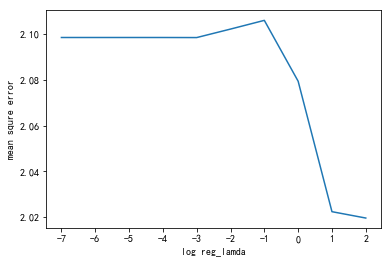

In [112]:
plt.plot(-cv_result['mean_test_score'])
plt.xticks(range(10),range(-7,3,1))
plt.xlabel('log reg_lamda')
plt.ylabel('mean squre error')
plt.show()